In [95]:
"""
USEFUL PLOT FUNCTIONS

plot_histograms(df,variables,n_rows,n_cols)
plot_distribution(df,var,target,**kwargs)
plot_categories(df,cat,target,**kwargs)
plot_correlation_map(df)
describe_more(df)
plot_variable_importance(x,y)
plot_model_var_imp(model,x,y)

"""

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import itertools
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [97]:
theData = pd.read_csv("train.csv")
theData = theData.dropna()
msk = np.random.rand(len(theData)) < 0.8
train = theData[msk]
test = theData[~msk]
#test = pd.read_csv("test.csv")

In [98]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,452.793103,0.675862,1.172414,36.424138,0.413793,0.441379,72.804655
std,250.589275,0.469674,0.476457,14.854775,0.572351,0.725296,66.186466
min,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,252.000000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,56.929200
75%,663.000000,1.000000,1.000000,48.000000,1.000000,1.000000,86.500000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [99]:
print(test.columns.values)
print(train.columns.values)
print(len(test))
print(len(train))
describe_more(train)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
38
145


,Datatype,Levels,Variable
1,int64,2,Survived
4,object,2,Sex
2,int64,3,Pclass
11,object,3,Embarked
6,int64,4,SibSp
7,int64,4,Parch
5,float64,55,Age
9,float64,87,Fare
8,object,111,Ticket
10,object,115,Cabin


In [100]:
train.drop(['Cabin', 'PassengerId'], axis = 1, inplace = True, errors = 'ignore')
train.replace(["NaN", 'NaT'], np.nan, inplace = True)
train.head()

/home/splacorn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/splacorn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [101]:
#one hot encoding sex and embarked values
#enc = OneHotEncoder()

In [102]:
#data scaling
#I originally treated this as a regression roblem so I scaled the columns. However, I realized that classification
#models like a random forest will not benifit from scaled data.
"""scaler = MinMaxScaler()
numeric_vals = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64']]
train_scaled = train
train_scaled[numeric_vals] = scaler.fit_transform(train[numeric_vals])"""

"scaler = MinMaxScaler()\nnumeric_vals = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64']]\ntrain_scaled = train\ntrain_scaled[numeric_vals] = scaler.fit_transform(train[numeric_vals])"

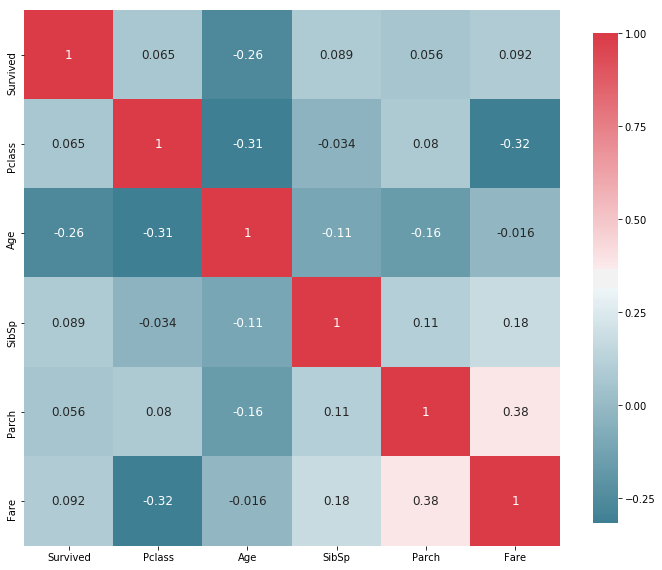

In [103]:
plot_correlation_map(train)

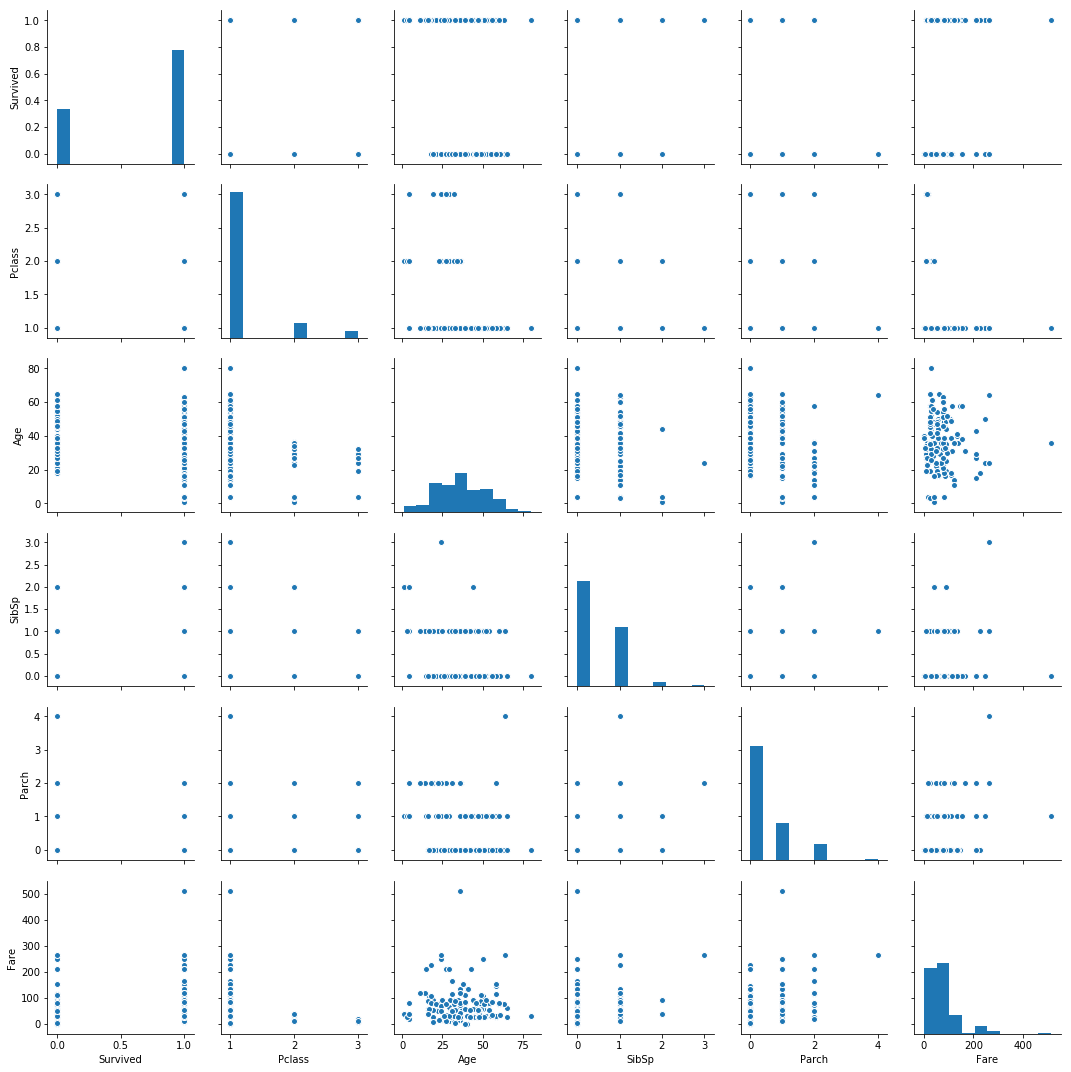

In [104]:
sns.pairplot(train, size = 2.5)

In [105]:
train.corr()["Survived"]

Survived    1.000000
Pclass      0.065275
Age        -0.263832
SibSp       0.089080
Parch       0.055955
Fare        0.092197
Name: Survived, dtype: float64

In [106]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


As expected, 

Now lets run a random forest and xg boost on this data!

After reading other notebooks on Kaggle, I've realized that I've barely scratched the tip of the iceberg (no pun intended).
I've seen people create new features by identifying the prefixes (Miss, Mr. etc.) of every person. Some have even wrote entire models (KNN and Kmeans) to predict and fill in the NAN values in columns.


In [107]:
#sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf = RandomForestClassifier(max_depth=2, random_state=0)
x = train[["Pclass","Age","SibSp","Parch","Fare"]]
y = train["Survived"]

In [108]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [109]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
print(clf.feature_importances_)

[ 0.03119492  0.47874071  0.026858    0.10745645  0.35574993]


In [112]:
theTestX = test[["Pclass","Age","SibSp","Parch","Fare"]]
theTestY = test["Survived"]

In [121]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report


In [127]:
def logTests(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    theF1Score = f1_score(y_test, yhat, average='macro')
    precision = precision_score(y_test, yhat, average='macro')
    recall = recall_score(y_test, yhat, average='macro')
    
    CM = confusion_matrix(y_test, yhat)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    return [theF1Score,precision,recall,TN,FN,TP,FP]

In [128]:
logTests(x,y,theTestX,theTestY,clf)

[0.65902293120638089, 0.86764705882352944, 0.65384615384615385, 4, 0, 25, 9]

In [113]:
predictedY = clf.predict(theTestX)

In [117]:
len(predictedY)

38

In [116]:
len(theTestY)

38